In [82]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [83]:
#ler a imagem (é pelo matplotlib mesmo)
img = plt.imread("style.jpg")

In [84]:
#fazendo o reshape da matriz de pixels (pra trabalhar de uma maneira melhor e não onerar o sistema)
pixels = np.reshape(img, (img.shape[0]*img.shape[1],3))/255


In [85]:
#Inicializando e treinando o modelo do minisom
print("training...")
som = MiniSom(3,3,3, sigma=1.,                   #eu instancio a classe do modelo com alguns valores pré=estabelecidos
                learning_rate=0.2, neighborhood_function = "bubble")    #3x3 = 9 cores finais
som.random_weights_init(pixels)                #depois eu venho e instancio meus pesos aleatoriamente
# e começo fazendo o meu treino aleatório pra depois partir pra parte de quantização desses pixels
starting_weights = som.get_weights().copy()     #salvando os pesos iniciais
som.train_random(pixels, 500)


#quantização
print("quantization...")
qnt = som.quantization(pixels)     #quantizando cada pixel da imagem

print("building new image...")     #e aí teremos, como resultado final, a minha imagem com as cores aprendidas de fato
clustered = np.zeros(img.shape)
for i, q in enumerate(qnt):         #colocando os valores quantizados pra uma nova imagem
    clustered[np.unravel_index(i, shape=(img.shape[0], img.shape[1]))] = q

print("done.")


training...
quantization...
building new image...
done.


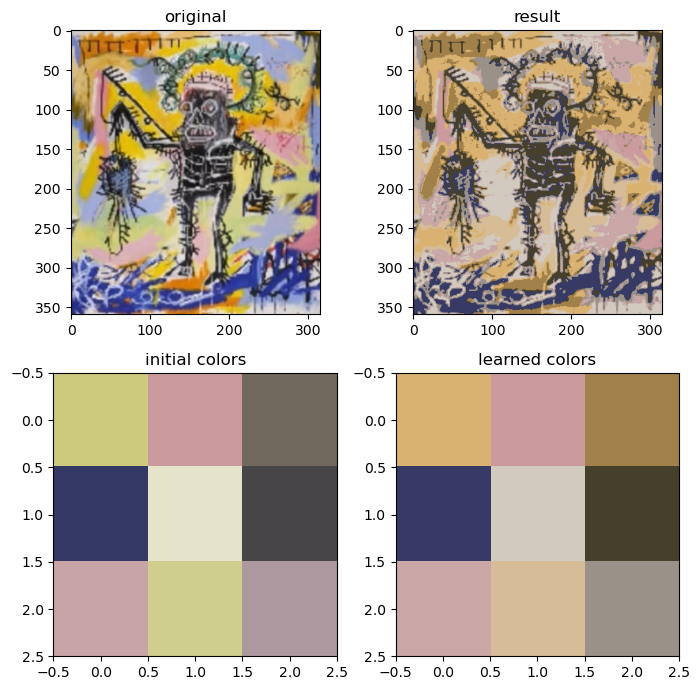

In [86]:
# faremos alguns subplots para termos alguns resultados de imagem no mesmo plot, no mesmo gráfico.
# Mostrando o resultado
plt.figure(figsize=(7,7))
plt.figure(1)

plt.subplot(221)
plt.title("original")
plt.imshow(img)

plt.subplot(222)
plt.title("result")
plt.imshow(clustered)

plt.subplot(223)
plt.title("initial colors")
plt.imshow(starting_weights, interpolation="none")

plt.subplot(224)
plt.title("learned colors")
plt.imshow(som.get_weights(), interpolation="none")

plt.tight_layout()
plt.show()
